In [13]:
import torch
import matplotlib.pyplot as plt
torch.cuda.is_available()

/home/harvey/anaconda3/envs/cs285/lib/python3.7/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [14]:
import glob
import tensorflow as tf

def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y


exp_name = "q1_test_MsPacman-v0_09-10-2022_21-42-48"
logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw3/data/%s/events*'%exp_name
eventfile = glob.glob(logdir)[0]

X_label='Train_EnvstepsSoFar'
Y_label='Train_AverageReturn'

X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
for i, (x, y) in enumerate(zip(X, Y)):
    print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

Iteration 0 | Train steps: 1 | Return: 448.4482727050781
Iteration 1 | Train steps: 10001 | Return: 474.6000061035156
Iteration 2 | Train steps: 20001 | Return: 491.8999938964844
Iteration 3 | Train steps: 30001 | Return: 461.5
Iteration 4 | Train steps: 40001 | Return: 444.8999938964844
Iteration 5 | Train steps: 50001 | Return: 474.0
Iteration 6 | Train steps: 60001 | Return: 483.5
Iteration 7 | Train steps: 70001 | Return: 474.5
Iteration 8 | Train steps: 80001 | Return: 421.70001220703125
Iteration 9 | Train steps: 90001 | Return: 465.29998779296875
Iteration 10 | Train steps: 100001 | Return: 462.0
Iteration 11 | Train steps: 110001 | Return: 456.0
Iteration 12 | Train steps: 120001 | Return: 492.5
Iteration 13 | Train steps: 130001 | Return: 481.79998779296875
Iteration 14 | Train steps: 140001 | Return: 433.0
Iteration 15 | Train steps: 150001 | Return: 502.6000061035156
Iteration 16 | Train steps: 160001 | Return: 510.79998779296875
Iteration 17 | Train steps: 170001 | Return: 

Text(0.5, 1.0, 'q1')

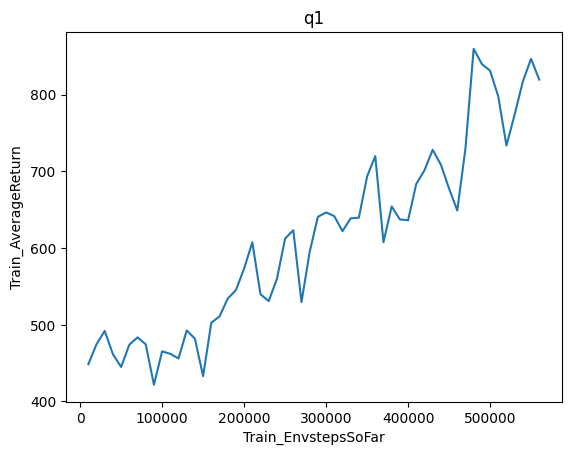

In [15]:
plt.plot(X[1:], Y)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.title("q1")